In [2]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [39]:
dataset = pd.read_csv("Data/suv_data.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Analysing data

In [40]:
# Let's check base information about dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### On the counterplot below, we can see we have a little bit unbalanced dataset. About 250 people purchased a car and 150 didn't

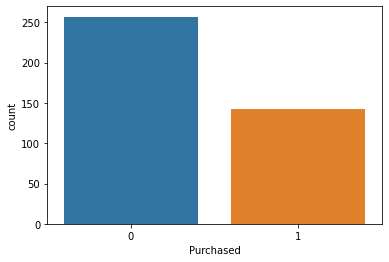

In [41]:
countplot = sns.countplot(x='Purchased', data=dataset)

### Both men and women did a similar decision. This same amount of men and women didn't decide to buy an SUV. However, in a group of people who purchased an SUV is a bit more women

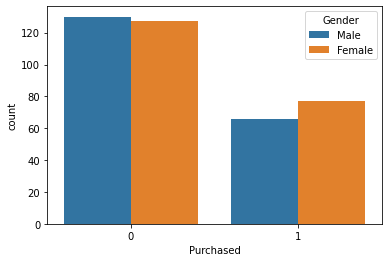

In [42]:
sns.countplot(x='Purchased', hue='Gender', data=dataset)

## Linear plot that compares the salary and age of clients who purchased and didn't purchase an SUV

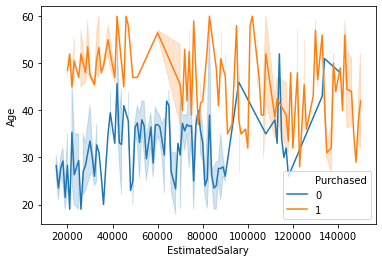

In [43]:
sns.lineplot(x="EstimatedSalary", y="Age",
             hue="Purchased",
             data=dataset)

### This linear plot might look a bit messy but we can read from it that older people with lower salary were buying SUVs much more often than younger people with a similar salary. 
It might be related to that SUV is considered more a family and safe car. Younger people might look more for sports cars. That looks nice. Or very cheap cars that are cheap in exploitation. This trend change when younger people has a bigger income. 

### Another thing is that even younger people were willing to buy an SUV if their salary was very high around 100k and more. 
For now, it's hard for me to find the reason. Maybe those are business people who want to look more professional and they choose elegant SUV that suits their job position. 


## I'll show this same data again but on scatterplot

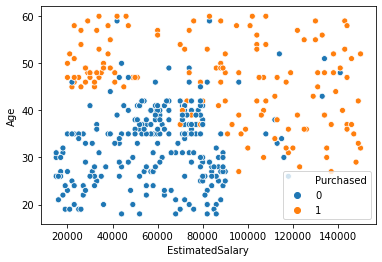

In [44]:
sns.scatterplot(x="EstimatedSalary", y="Age", hue="Purchased", data=dataset)

I think in here it's much more visible that younger people (up to 40 years old) with the lowest salary till 80k didn't purchase an SUV.  

##  PairPlot


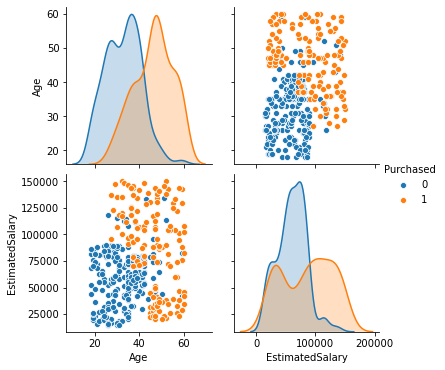

In [45]:
temp_data = dataset.drop("User ID", axis=1)
sns.pairplot(temp_data, hue="Purchased")

*I removed UserID column for this example because they are just random numbers. And we woudln't be able to read any information from that plot.*


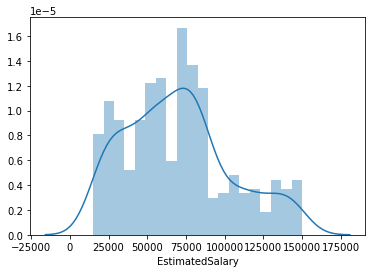

In [46]:
sns.distplot(dataset['EstimatedSalary'], bins=20)

## Prediction

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

### Let me very quickly prepare dataset
Because gender is categorical data with strings values we have to change it to 0 and 1 values. For example where 1 means it's a man and 0 means it's a woman

In [77]:
gender = pd.get_dummies(dataset["Gender"])
gender.drop("Female", axis=1, inplace=True)

# Delete Gender column from dataset
dataset.drop("Gender", axis=1, inplace=True)
dataset

In [54]:
dataset.insert(2, "Gender", gender)
print(dataset.head())

# We added processed gender values at 2nd index 

    User ID  Age  Gender  EstimatedSalary  Purchased
0  15624510   19       1            19000          0
1  15810944   35       1            20000          0
2  15668575   26       0            43000          0
3  15603246   27       0            57000          0
4  15804002   19       1            76000          0


In [79]:
X = dataset.iloc[:,[1,2,3]]
y = dataset.iloc[:,4]
print(X)

     Age  Gender  EstimatedSalary
0     19       1            19000
1     35       1            20000
2     26       0            43000
3     27       0            57000
4     19       1            76000
..   ...     ...              ...
395   46       0            41000
396   51       1            23000
397   50       0            20000
398   36       1            33000
399   49       0            36000

[400 rows x 3 columns]


In [123]:
# Spllit data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [124]:
# Transform data so algorytm can use them to make prediction

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
print(X_test)
X_test = sc.transform(X_test)


     Age  Gender  EstimatedSalary
132   30       1            87000
309   38       0            50000
341   35       1            75000
196   30       0            79000
246   35       0            50000
..   ...     ...              ...
146   27       0            96000
135   23       1            63000
390   48       1            33000
264   48       1            90000
364   42       1           104000

[100 rows x 3 columns]


In [95]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [96]:
# make prdiction
y_pred = classifier.predict(X_test)

# check accuracy
accuracy_score(y_test, y_pred)

0.82

Our model can predict if people buy an SUV based age, gender and a salary data. The accuracy of our model is **82%** which is quite good

### Let's check probability that student buy an SUV
Let's say it's a man, 23 years old, with 17k income (15k was the lowest in the dataset)

In [128]:

student = X[0:0]
print(student)
a = {'Age':23, 'Gender':1, 'EstimatedSalary':17000}

student = student.append(a, ignore_index=True)

student = sc.transform(student) # transform data
print(student)

Empty DataFrame
Columns: [Age, Gender, EstimatedSalary]
Index: []
[[-1.49802789  1.02020406 -1.52455616]]


In [129]:
probability = classifier.predict(student)
print(probability)

[0]


As we analyzed data we got to know young people especially with lower income didn't buy SUVs. And our model is right in this example

#### Let's check for different example

In [138]:
student = X[0:0]
print(student)
a = {'Age':40, 'Gender':1, 'EstimatedSalary':100000}

student = student.append(a, ignore_index=True)

student = sc.transform(student) # transform data

probability = classifier.predict(student)
print(probability)

Empty DataFrame
Columns: [Age, Gender, EstimatedSalary]
Index: []
[1]


Our model for predict that 40 years old man with 100k salary should buy an SUV. 